# Dislocation and diffusion creep

In this exercise we study the relative importance of the two deformation mechanisms dislocation creep and diffusion creep, which depends primarily on pressure, temperature and grain size.

For simplicity, we consider dislocation and diffusion creep in olivine, which is a major constituent mineral of the Earth's upper mantle. Both deformation mechanisms can be described by the rheological equation

$\dot{\varepsilon} = A \left( \frac{\sigma}{\mu} \right)^n \left( \frac{b}{d} \right)^m e^{-(E+pV)/RT} $

where $\dot{\varepsilon}$ is strain rate, $A$ is a scaling factor, $\sigma$ is stress, $\mu$ is shear modulus (taken to be 81 GPa), $n$ is the stress exponent, $m$ is the grain size exponent, $b$ is the length of the so-called Burgers vector (0.5 nm for olivine), $d$ is grain size, $E$ is activation energy, $V$ is activation volume, $T$ is temperature, $p$ is pressure, and $R$ is the gas constant (8.3144598 J mol$^{−1}$ K$^{−1}$). For the two different deformation mechanisms, we adopt the following values, determined experimentally for dry olivine (see Karato, Geophys. Res. Lett. 19, 1992):

**Dislocation creep**: $A=3.5\cdot 10^{22}$ s$^{-1}$, $n=3.5$, $m=0$, $E=540\cdot 10^{3}$ J mol$^{-1}$, $V=20 \cdot 10^{-6}$ m$^3$ mol$^{-1}$.

**Diffusion creep**: $A=8.7\cdot 10^{15}$ s$^{-1}$, $n=1.0$, $m=2.5$, $E=300\cdot 10^{3}$ J mol$^{-1}$, $V=6 \cdot 10^{-6}$ m$^3$ mol$^{-1}$.

'Dry' means that the olivine is not polluted by hydrogen atoms. When hydrogen is present (so-called wet olivin), the activation energies and volumes typically drop significantly, thus leading to larger strain rates for a given stress.

## 0. Import Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Setup

We start by initializing all necessary variables with some plausible values. Then we compute strain rate for dislocation and for diffusion creep.

In [2]:
# set parameters for dislocation creep
A_dis=3.5e22
n_dis=3.5
m_dis=0.0
E_dis=540.0e3
V_dis=20.0e-6

# set parameters for diffusion creep
A_dif=8.7e15
n_dif=1.0
m_dif=2.5
E_dif=300.0e3
V_dif=6.0e-6

# set parameters valid for both dislocation and diffusion creep
mu=81.0e6
b=0.5e-9
R=8.3144598

d=2.0e-3 # grain size in m
p=10.0e9 # pressure in Pa (10 GPa corresponds to around 300 km depth in the Earth)
T=1600.0 # temperature in K (1600 K is a good approximation for depths between around 200 and several hundred km depth.)
sigma=4.5e6 # stress in Pa, a value far below the yield stress

# compute strain rate
epsilon_dis=A_dis*(sigma/mu)**n_dis * (b/d)**m_dis * np.exp(-(E_dis+p*V_dis)/(R*T))
epsilon_dif=A_dif*(sigma/mu)**n_dif * (b/d)**m_dif * np.exp(-(E_dif+p*V_dif)/(R*T))

print('dislocation creep strain rate: %g 1/s' % (epsilon_dis))
print('diffusion creep strain rate: %g 1/s\n' % (epsilon_dif))

dislocation creep strain rate: 9.83007e-07 1/s
diffusion creep strain rate: 2.6701e-14 1/s



## 2. Dependence on pressure

In the next step, we study the pressure (i.e. depth) dependence of strain rate. For this we let pressure $p$ vary within a range of values, keeping all the other parameters fixed.

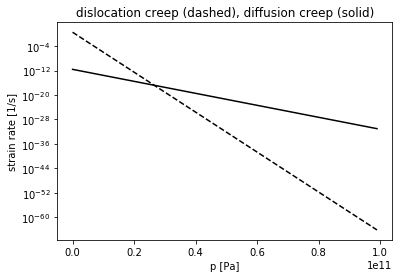

In [3]:
# set a range of pressure values
p=1.0e9*np.arange(0.0,100.0,1.0)

# compute strain rate
epsilon_dis=A_dis*(sigma/mu)**n_dis * (b/d)**m_dis * np.exp(-(E_dis+p*V_dis)/(R*T))
epsilon_dif=A_dif*(sigma/mu)**n_dif * (b/d)**m_dif * np.exp(-(E_dif+p*V_dif)/(R*T))

# plot
plt.semilogy(p,epsilon_dis,'k--')
plt.semilogy(p,epsilon_dif,'k')
plt.xlabel('p [Pa]')
plt.ylabel('strain rate [1/s]')
plt.title('dislocation creep (dashed), diffusion creep (solid)')
plt.show()

# 3. Exercises

1) Looking at the plot produced in part 2, explain why the strain rate for dislocation creep decreases more rapidly than the strain rate for diffusion creep. Above which pressure does diffusion creep become the dominant deformation mechanism?

2) To study the grain size dependence, set the pressure $p$ to 20 GPa and let $d$ vary between $10^{-5}$ and $10^{-1}$ m. Plot the strain rates for diffusion and dislocation creep as a function of grain size $d$. Below which grain size is diffusion creep the dominant deformation mechanism?

3) **Optional**: Combining exercises 1) and 2), produce a 2D map showing the pressure and grain size ranges where either diffusion or dislocation creep dominate.